In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
from matplotlib import pyplot as plt
import math

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

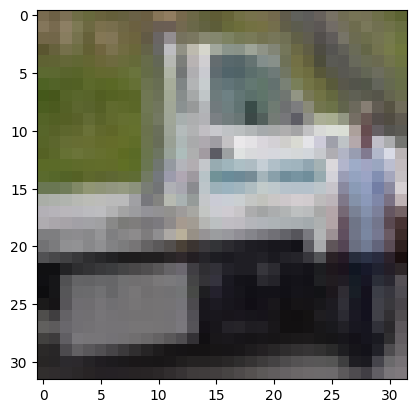

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
idx = np.random.randint(50000)
plt.imshow(x_train[idx, :,:,:])
plt.show()
y_train[idx]

# Network Build

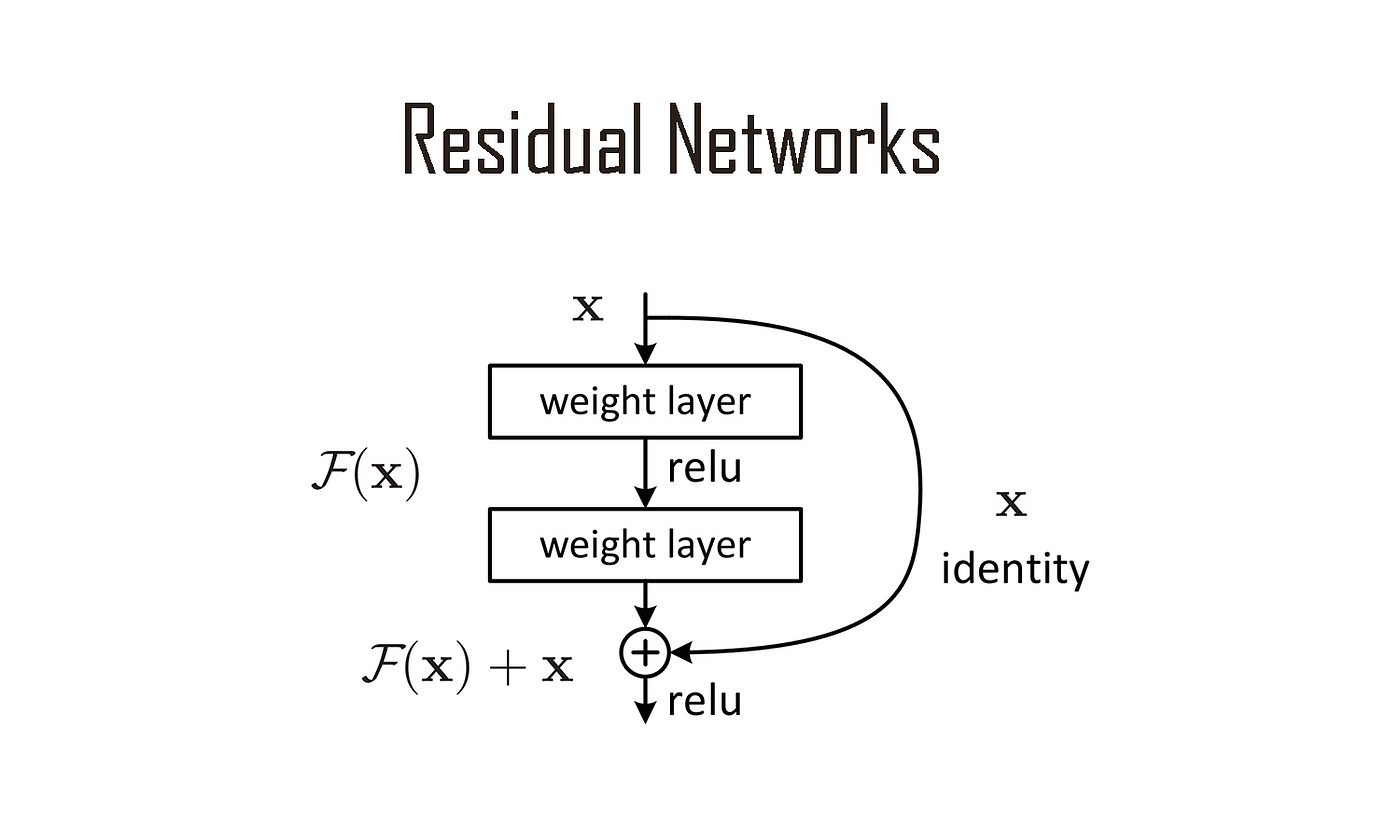

In [ ]:
#toy resnet model
# Functional API
inputs = tf.keras.Input(shape=(32, 32, 3), name="img")
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)

block_1_output = tf.keras.layers.MaxPooling2D(3)(x)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = tf.keras.layers.add([x, block_2_output])
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
## H, W, 64 --> H/2, W/2, 64 (normal Avgpooling 2D)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  #--> 64
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 9, 9, 64)     0           ['conv2d_1[0][0]']               
                                                                                         

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'),
    ]
)

In [ ]:
num_epochs = 30

In [ ]:
train_history = model.fit(x_train, y_train, batch_size=40, epochs=num_epochs, validation_split=0.2)

Epoch 1/30
1000/1000 [==============================] - 24s 10ms/step - loss: 2.0449 - acc: 0.2049 - val_loss: 1.8025 - val_acc: 0.3020
Epoch 2/30
1000/1000 [==============================] - 9s 9ms/step - loss: 1.8008 - acc: 0.2978 - val_loss: 1.6687 - val_acc: 0.3603
Epoch 3/30
1000/1000 [==============================] - 9s 9ms/step - loss: 1.6746 - acc: 0.3546 - val_loss: 1.6137 - val_acc: 0.3868
Epoch 4/30
1000/1000 [==============================] - 9s 9ms/step - loss: 1.5906 - acc: 0.3938 - val_loss: 1.5094 - val_acc: 0.4339
Epoch 5/30
1000/1000 [==============================] - 10s 10ms/step - loss: 1.5150 - acc: 0.4300 - val_loss: 1.5135 - val_acc: 0.4389
Epoch 6/30
1000/1000 [==============================] - 9s 9ms/step - loss: 1.4413 - acc: 0.4638 - val_loss: 1.4243 - val_acc: 0.4801
Epoch 7/30
1000/1000 [==============================] - 9s 9ms/step - loss: 1.3758 - acc: 0.4935 - val_loss: 1.3352 - val_acc: 0.5089
Epoch 8/30
1000/1000 [==============================] - 10

In [ ]:
train_history.history

{'acc': [0.21857500076293945,
  0.32717499136924744,
  0.3815250098705292,
  0.4233500063419342,
  0.46424999833106995,
  0.49857500195503235,
  0.5294250249862671,
  0.5509750247001648,
  0.5689250230789185,
  0.5846750140190125,
  0.5975000262260437,
  0.6149749755859375,
  0.6263999938964844,
  0.6376500129699707,
  0.6481249928474426,
  0.6561499834060669,
  0.6657249927520752,
  0.6742500066757202,
  0.6807000041007996,
  0.6918249726295471,
  0.6963750123977661,
  0.7044000029563904,
  0.7134000062942505,
  0.7161750197410583,
  0.7255749702453613,
  0.7320749759674072,
  0.7366250157356262,
  0.7467749714851379,
  0.7475249767303467,
  0.7527999877929688],
 'loss': [2.005377769470215,
  1.7388200759887695,
  1.622955083847046,
  1.5241379737854004,
  1.4345717430114746,
  1.362998127937317,
  1.294224500656128,
  1.238749384880066,
  1.1914407014846802,
  1.1471349000930786,
  1.106473445892334,
  1.0713059902191162,
  1.0424655675888062,
  1.0108072757720947,
  0.98272478580474

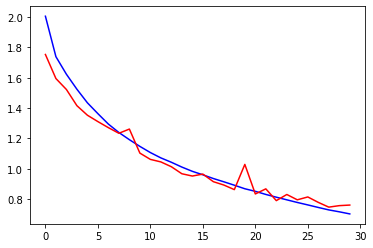

In [ ]:
plt.plot(range(num_epochs), train_history.history["loss"][:num_epochs], 'b')
plt.plot(range(num_epochs), train_history.history["val_loss"][:num_epochs], 'r')
plt.show()

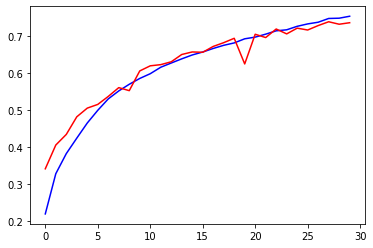

In [ ]:
plt.plot(range(num_epochs), train_history.history["acc"][:num_epochs], 'b')
plt.plot(range(num_epochs), train_history.history["val_acc"][:num_epochs], 'r')
plt.show()

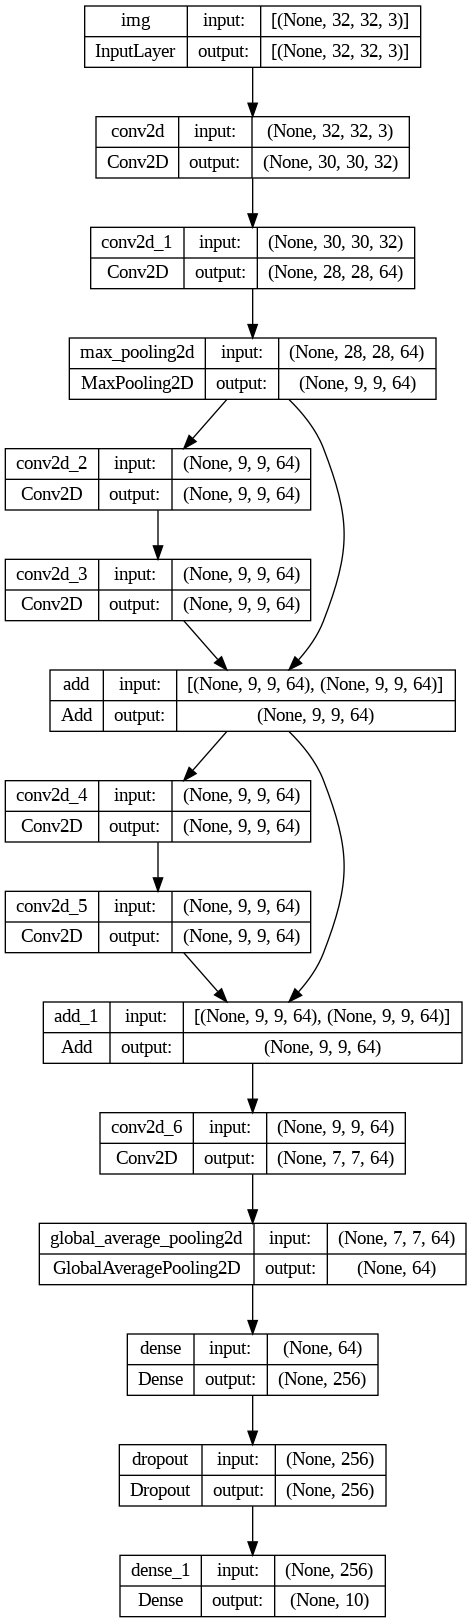

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)